In [1]:
#if not install
pip install numpy
pip install pandas
pip install sklearn
pip install xgboost
pip install catboost

In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from catboost import  CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [3]:
#dark mode for plots
import matplotlib.pyplot as plt  
plt.style.use('dark_background')

For Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/MyDrive/DS/Data/Fight_historical_data_UFC_1993_2021/
data = pd.read_csv('drive/MyDrive/DS/Data/Fight_historical_data_UFC_1993_2021/data.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive/MyDrive/DS/Data/Fight_historical_data_UFC_1993_2021/

data.csv	       raw_fighter_details.csv
preprocessed_data.csv  raw_total_fight_data.csv


In [ ]:
data = pd.read_csv('drive/MyDrive/DS/Data/Fight_historical_data_UFC_1993_2021/data.csv')
data.head()

For locall 

In [4]:
data = pd.read_csv('data/data.csv')
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [ ]:
pr_data = pd.read_csv('data/preprocessed_data.csv')
pr_data.head()

In [5]:
data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [6]:
#data.info()
data.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [8]:
data.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=144)

In [ ]:
print(f'data shape {data.shape}')
#print(f'pr_data shape {pr_data.shape}')

Red     3979
Blue    1923
Draw     110
Name: Winner, dtype: int64


<AxesSubplot:title={'center':'Winner'}, ylabel='Winner'>

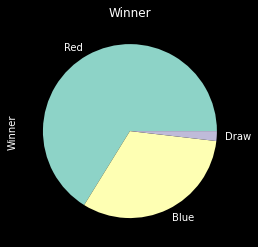

In [11]:
print(data['Winner'].value_counts())
data['Winner'].value_counts().plot(kind='pie', title='Winner')

In [59]:
data['country'] = data['location'].apply(lambda x : x.split(',')[-1])
data['country']

0          USA
1          USA
4          USA
5          USA
6          USA
         ...  
5759       USA
5767     Japan
5799     Japan
5840       USA
5884       USA
Name: country, Length: 3890, dtype: object

<AxesSubplot:title={'center':'countries'}>

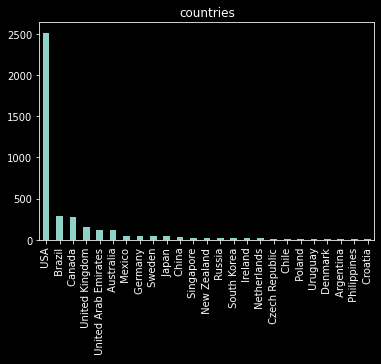

In [179]:
data['country'].value_counts().plot(kind='bar', title='countries')

In [75]:
data['fighters'] = pd.concat([data['R_fighter'], data['B_fighter']], ignore_index=True)


<AxesSubplot:title={'center':'fighters with the max of fights'}>

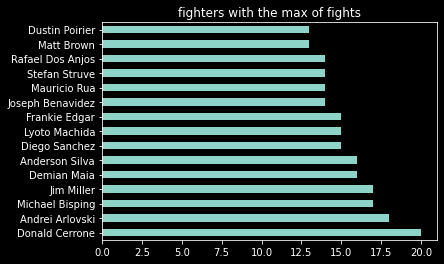

In [180]:
data['fighters'].value_counts().head(15).plot(kind='barh', title='fighters with the max of fights')


In [105]:
data['year'] = data['date'].apply(lambda x : x.split('-')[0])

<AxesSubplot:title={'center':'number of fights per year'}>

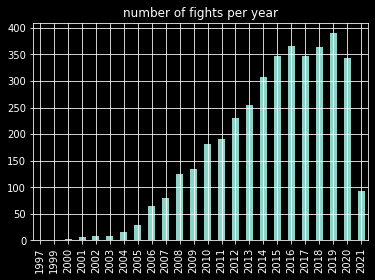

In [176]:
data['year'].value_counts().sort_index().plot(kind='bar',
                                                grid=True,
                                                title='number of fights per year')

<AxesSubplot:title={'center':'age of fighters'}>

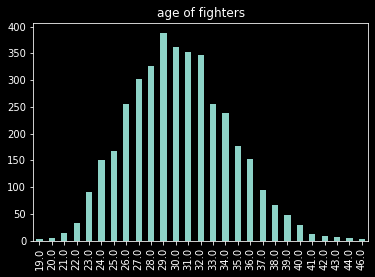

In [175]:
data['age'] = pd.concat([data['R_age'], data['B_age']], ignore_index=True)
data['age'].astype(int)
data['age'].value_counts().sort_index().plot(kind='bar', title='age of fighters')

In [29]:
data['weight_class'].unique() 

array(['Bantamweight', 'Middleweight', 'Heavyweight', 'WomenStrawweight',
       'WomenBantamweight', 'Lightweight', 'Welterweight', 'Flyweight',
       'LightHeavyweight', 'Featherweight', 'WomenFlyweight',
       'WomenFeatherweight', 'CatchWeight', 'OpenWeight'], dtype=object)

<AxesSubplot:title={'center':'Women'}>

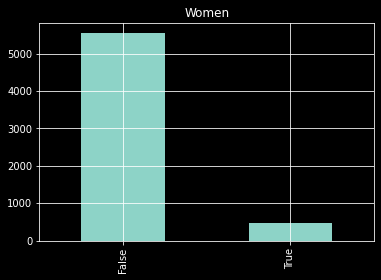

In [50]:
women = data['weight_class'].str.contains('Women')

women.value_counts().plot(kind='bar', title='Women', grid='True')

<AxesSubplot:title={'center':'The figher division'}, ylabel='weight_class'>

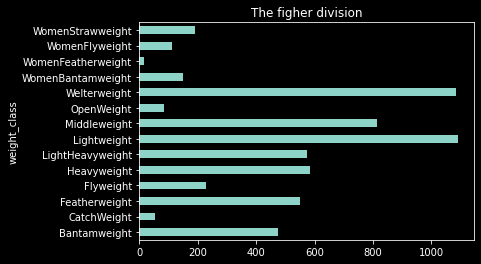

In [63]:
data['weight_class'].value_counts().sort_index().plot(kind='barh', 
                                                        title='The figher division', 
                                                        ylabel='weight_class')

Last fight recorded on this dataset was 20 March 2021

In [9]:
last_fight = data.loc[0, ['date']]
print(last_fight)

date    2021-03-20
Name: 0, dtype: object


Data Cleaning

Before April 2001, there were almost no rules in UFC (no judges, no time limits, no rounds, etc.). It's up to this precise date that UFC started to implement a set of rules known as "Unified Rules of Mixed Martial Arts". Therefore, we delete all fights before this major update in UFC's rules history.

In [23]:
limit_date = '2001-04-01'
data = data[(data['date'] > limit_date)]
print(data.shape)

(5758, 163)


In [12]:
print("Total NaN in dataframe :" , data.isna().sum().sum())
print("Total NaN in each column of the dataframe")
na = []
for index, col in enumerate(data):
    na.append((index, data[col].isna().sum())) 
na_sorted = na.copy()
na_sorted.sort(key = lambda x: x[1], reverse = True) 

for i in range(len(data.columns)):
    print(data.columns[na_sorted[i][0]],":", na_sorted[i][1], "NaN")

Total NaN in dataframe : 106494
Total NaN in each column of the dataframe
B_avg_KD : 1427 NaN
B_avg_opp_KD : 1427 NaN
B_avg_SIG_STR_pct : 1427 NaN
B_avg_opp_SIG_STR_pct : 1427 NaN
B_avg_TD_pct : 1427 NaN
B_avg_opp_TD_pct : 1427 NaN
B_avg_SUB_ATT : 1427 NaN
B_avg_opp_SUB_ATT : 1427 NaN
B_avg_REV : 1427 NaN
B_avg_opp_REV : 1427 NaN
B_avg_SIG_STR_att : 1427 NaN
B_avg_SIG_STR_landed : 1427 NaN
B_avg_opp_SIG_STR_att : 1427 NaN
B_avg_opp_SIG_STR_landed : 1427 NaN
B_avg_TOTAL_STR_att : 1427 NaN
B_avg_TOTAL_STR_landed : 1427 NaN
B_avg_opp_TOTAL_STR_att : 1427 NaN
B_avg_opp_TOTAL_STR_landed : 1427 NaN
B_avg_TD_att : 1427 NaN
B_avg_TD_landed : 1427 NaN
B_avg_opp_TD_att : 1427 NaN
B_avg_opp_TD_landed : 1427 NaN
B_avg_HEAD_att : 1427 NaN
B_avg_HEAD_landed : 1427 NaN
B_avg_opp_HEAD_att : 1427 NaN
B_avg_opp_HEAD_landed : 1427 NaN
B_avg_BODY_att : 1427 NaN
B_avg_BODY_landed : 1427 NaN
B_avg_opp_BODY_att : 1427 NaN
B_avg_opp_BODY_landed : 1427 NaN
B_avg_LEG_att : 1427 NaN
B_avg_LEG_landed : 1427 NaN
B

In [13]:
from sklearn.impute import SimpleImputer

imp_features = ['R_Weight_lbs', 'R_Height_cms', 'B_Height_cms', 'R_age', 'B_age', 'R_Reach_cms', 'B_Reach_cms']
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

for feature in imp_features:
    imp_feature = imp_median.fit_transform(data[feature].values.reshape(-1,1))
    data[feature] = imp_feature

imp_stance = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_R_stance = imp_stance.fit_transform(data['R_Stance'].values.reshape(-1,1))
imp_B_stance = imp_stance.fit_transform(data['B_Stance'].values.reshape(-1,1))
data['R_Stance'] = imp_R_stance
data['B_Stance'] = imp_B_stance

In [14]:
print('Number of features with NaN values :', len([x[1] for x in na if x[1] > 0]))

Number of features with NaN values : 109


In [15]:
na_features = ['B_avg_BODY_att', 'R_avg_BODY_att']
data.dropna(subset = na_features, inplace = True)

data.drop(['Referee', 'location'], axis = 1, inplace = True)

In [17]:
print(data.shape)
print("Total NaN in dataframe :" , data.isna().sum().sum())

(4316, 142)
Total NaN in dataframe : 0



Feature Engineering

In [18]:
list(data.select_dtypes(include=['object', 'bool']))

['R_fighter',
 'B_fighter',
 'date',
 'Winner',
 'title_bout',
 'weight_class',
 'B_Stance',
 'R_Stance']

In [19]:
print(data['B_draw'].value_counts())
print(data['R_draw'].value_counts())
data.drop(['B_draw', 'R_draw'], axis=1, inplace=True)

0    4316
Name: B_draw, dtype: int64
0    4316
Name: R_draw, dtype: int64


In [20]:
data = data[data['Winner'] != 'Draw']
data = data[data['weight_class'] != 'Catch Weight']

Data Preprocessing

In [25]:
#  i = index of the fighter's fight, 0 means the last fight, -1 means first fight
def select_fight_row(data, name, i): 
    data_temp = data[(data['R_fighter'] == name) | (data['B_fighter'] == name)]  # filter data on fighter's name
    data_temp.reset_index(drop=True, inplace=True) #  as we created a new temporary dataframe, we have to reset indexes
    idx = max(data_temp.index)  #  get the index of the oldest fight
    if i > idx:  #  if we are looking for a fight that didn't exist, we return nothing
        return 
    arr = data_temp.iloc[i,:].values
    return arr

select_fight_row(data, 'Amanda Nunes', 0) #  we get the last fight of Amanda Nunes

array(['Amanda Nunes', 'Megan Anderson', '2021-03-06', 'Red', True,
       'WomenFeatherweight', 0.5, 0.0, 0.498125, 0.415, 0.125, 0.25875,
       0.25, 0.1875, 0.5625, 0.25, 16.4375, 8.1875, 17.9375, 8.875,
       34.375, 25.3125, 39.375, 27.25, 1.0, 0.25, 2.25, 0.875, 14.0,
       6.8125, 10.875, 4.3125, 2.4375, 1.375, 4.0, 2.75, 0.0, 0.0, 3.0625,
       1.8125, 10.5625, 4.125, 10.1875, 2.5, 2.125, 1.5625, 4.25, 3.5,
       3.75, 2.5, 3.5, 2.875, 58.0, 136.3125, 250.3125, 7, 0, 0, 1, 2, 3,
       2, 0, 0, 0, 2, 1, 0, 'Orthodox', 182.88, 182.88, 145.0,
       0.25146484375, 0.0, 0.5198291015625, 0.428233642578125,
       0.633231201171875, 0.005947265625, 1.0087890625, 0.250732421875,
       0.0, 0.001953125, 170.2108154296875, 90.3916015625,
       94.584716796875, 35.8212890625, 213.79296875, 125.3968505859375,
       136.8037109375, 72.43798828125, 6.637939453125, 5.1295166015625,
       3.853271484375, 0.033935546875, 136.6878662109375,
       65.3922119140625, 73.3140869140625, 1

In [26]:
# get all active UFC fighters (according to the limit_date parameter)
def list_fighters(data, limit_date):
    data_temp = data[data['date'] > limit_date]
    set_R = set(data_temp['R_fighter'])
    set_B = set(data_temp['B_fighter'])
    fighters = list(set_R.union(set_B))
    return fighters

In [28]:
fighters = list_fighters(data, '2017-01-01')
print(len(fighters))

850


In [29]:
def build_data(data, fighters, i):      
    arr = [select_fight_row(data, fighters[f], i) for f in range(len(fighters)) if select_fight_row(data, fighters[f], i) is not None]
    cols = [col for col in data] 
    data_fights = pd.DataFrame(data=arr, columns=cols)
    data_fights.drop_duplicates(inplace=True)
    data_fights['title_bout'] = data_fights['title_bout'].replace({True: 1, False: 0})
    data_fights.drop(['R_fighter', 'B_fighter', 'date'], axis=1, inplace=True)
    return data_fights

data_train = build_data(data, fighters, 0)
data_test = build_data(data, fighters, 1)

In [31]:
data_train.head(5)

,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Blue,0,Flyweight,0.0,0.0,0.280,0.435,0.000,0.34,0.5,...,0,0,1,0,Orthodox,167.64,165.10,135.0,24.0,25.0
1,Blue,0,WomenBantamweight,0.0,0.0,0.385,0.420,0.255,0.25,0.5,...,1,0,1,0,Orthodox,170.18,170.18,135.0,31.0,30.0
2,Blue,0,LightHeavyweight,0.0,0.0,0.600,0.780,0.000,0.63,0.0,...,0,1,0,0,Orthodox,190.50,193.04,205.0,30.0,31.0
3,Blue,0,Middleweight,0.0,2.0,0.330,0.580,0.000,0.00,0.0,...,1,0,0,0,Orthodox,180.34,190.50,185.0,26.0,26.0
4,Red,0,WomenStrawweight,0.0,0.0,0.450,0.450,0.000,0.00,0.0,...,0,0,1,0,Southpaw,162.56,165.10,115.0,26.0,33.0


In [32]:
print(data_train.shape)
print(data_test.shape)

(648, 137)
(611, 137)


In [33]:
print(len(data_train[data_train['Winner'] == 'Blue']))
print(len(data_train[data_train['Winner'] == 'Red']))
print(len(data_test[data_test['Winner'] == 'Blue']))
print(len(data_test[data_test['Winner'] == 'Red']))

278
370
258
353


In [34]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer((OrdinalEncoder(), ['weight_class', 'B_Stance', 'R_Stance']), remainder='passthrough')

# If the winner is from the Red corner, Winner label will be encoded as 1, otherwise it will be 0 (Blue corner)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(data_train['Winner'])
y_test = label_encoder.transform(data_test['Winner'])

X_train, X_test = data_train.drop(['Winner'], axis=1), data_test.drop(['Winner'], axis=1)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(648, 136)
(648,)
(611, 136)
(611,)


Random Forest Model

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Random Forest composed of 100 decision trees. We optimized parameters using cross-validation and GridSearch tool paired together
random_forest = RandomForestClassifier(n_estimators=100, 
                                       criterion='entropy', 
                                       max_depth=10, 
                                       min_samples_split=2,
                                       min_samples_leaf=1, 
                                       random_state=0)

model = Pipeline([('encoding', preprocessor), ('random_forest', random_forest)])
model.fit(X_train, y_train)

# We use cross-validation with 5-folds to have a more precise accuracy (reduce variation)
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print('Accuracy mean : ', accuracies.mean())
print('Accuracy standard deviation : ', accuracies.std())

y_pred = model.predict(X_test)
print('Testing accuracy : ', accuracy_score(y_test, y_pred), '\n')

target_names = ["Blue","Red"]
print(classification_report(y_test, y_pred, labels=[0,1], target_names=target_names))

Accuracy mean :  0.603422778771616
Accuracy standard deviation :  0.051023597443385436
Testing accuracy :  0.6857610474631751 

              precision    recall  f1-score   support

        Blue       0.68      0.48      0.56       258
         Red       0.69      0.84      0.75       353

    accuracy                           0.69       611
   macro avg       0.68      0.66      0.66       611
weighted avg       0.68      0.69      0.67       611



Predictions

In [39]:
def predict(data, pipeline, blue_fighter, red_fighter, weightclass, rounds, title_bout=False): 
    
    #We build two dataframes, one for each figther 
    f1 = data[(data['R_fighter'] == blue_fighter) | (data['B_fighter'] == blue_fighter)].copy()
    f1.reset_index(drop=True, inplace=True)
    f1 = f1[:1]
    f2 = data[(data['R_fighter'] == red_fighter) | (data['B_fighter'] == red_fighter)].copy()
    f2.reset_index(drop=True, inplace=True)
    f2 = f2[:1]
    
    # if the fighter was red/blue corner on his last fight, we filter columns to only keep his statistics (and not the other fighter)
    # then we rename columns according to the color of  the corner in the parameters using re.sub()
    if (f1.loc[0, ['R_fighter']].values[0]) == blue_fighter:
        result1 = f1.filter(regex='^R', axis=1).copy() #here we keep the red corner stats
        result1.rename(columns = lambda x: re.sub('^R','B', x), inplace=True)  #we rename it with "B_" prefix because he's in the blue_corner
    else: 
        result1 = f1.filter(regex='^B', axis=1).copy()
    if (f2.loc[0, ['R_fighter']].values[0]) == red_fighter:
        result2 = f2.filter(regex='^R', axis=1).copy()
    else:
        result2 = f2.filter(regex='^B', axis=1).copy()
        result2.rename(columns = lambda x: re.sub('^B','R', x), inplace=True)
        
    fight = pd.concat([result1, result2], axis = 1) # we concatenate the red and blue fighter dataframes (in columns)
    fight.drop(['R_fighter','B_fighter'], axis = 1, inplace = True) # we remove fighter names
    fight.insert(0, 'title_bout', title_bout) # we add tittle_bout, weight class and number of rounds data to the dataframe
    fight.insert(1, 'weight_class', weightclass)
    fight.insert(2, 'no_of_rounds', rounds)
    fight['title_bout'] = fight['title_bout'].replace({True: 1, False: 0})
    
    pred = pipeline.predict(fight)
    proba = pipeline.predict_proba(fight)
    if (pred == 1.0): 
        print("The predicted winner is", red_fighter, 'with a probability of', round(proba[0][1] * 100, 2), "%")
    else:
        print("The predicted winner is", blue_fighter, 'with a probability of ', round(proba[0][0] * 100, 2), "%")
    return proba

In [40]:
predict(data, model, 'Kamaru Usman', 'Colby Covington', 'Welterweight', 5, True) 

The predicted winner is Colby Covington with a probability of 77.44 %


array([[0.22564469, 0.77435531]])

In [41]:
predict(data, model, 'Max Holloway', 'Alexander Volkanovski', 'Featherweight', 5, True) 

The predicted winner is Alexander Volkanovski with a probability of 75.45 %


array([[0.24545702, 0.75454298]])

In [ ]:
predict(data, model, 'Amanda Nunes', 'Germaine de Randamie', "Women's Bantamweight", 5, True)

In [44]:
predict(data, model, 'Jose Aldo', 'Marlon Moraes', 'Bantamweight', 3, False)

The predicted winner is Jose Aldo with a probability of  61.63 %


array([[0.61630494, 0.38369506]])

In [45]:
predict(data, model, 'Urijah Faber', 'Petr Yan', 'Bantamweight', 3, False)

The predicted winner is Petr Yan with a probability of 69.67 %


array([[0.3032653, 0.6967347]])